In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
from platform import python_version

print(python_version())

3.8.5


## Functions

In [30]:
# saving file do not show labels
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}

rcParams['font.family'] = 'Times New Roman'
rcParams['font.weight'] = 'normal'
rcParams['font.size'] = 12
rcParams['figure.figsize'] = (7, 5)
# plt.rc('font', **font)

def draw_and_save_one_line_graph(x, xlabel, ylabel, title, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
#     axes.set_title(title, **font)
    sns.lineplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('graph/' + output_name.replace(' ', '_') + '.svg', bbox_inches='tight')
        
def draw_and_save_one_line_graph_points(x, xlabel, ylabel, title, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
#     axes.set_title(title, **font)
    sns.pointplot(x=x_data, ax=axes, y=x)
    #     sns.lineplot(x=x_data, ax = axes, y=x)
    #     plt.legend(loc = 'best')
    #     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('graph/' + output_name.replace(' ', '_') + '.svg', bbox_inches='tight')


def draw_and_save_three_lines_graph(x, y, z, xlabel, ylabel, title, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
#     axes.set_title(title, **font)
    sns.lineplot(x=x_data, ax = axes, y=x, label = 'Normal strategy')    
    sns.lineplot(x=x_data, ax = axes, y=y, label = 'Call by name strategy')
    sns.lineplot(x=x_data, ax = axes, y=z, label = 'Call by value strategy')
    plt.legend(loc = 'best')
    plt.legend(prop=font)
    
    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('graph/' + output_name.replace(' ', '_') + '.svg', bbox_inches='tight')

## Experiment's data loading

In [4]:
norm_df = pd.read_csv('normal_strat.csv')
val_df = pd.read_csv('call_by_value.csv')
name_df = pd.read_csv('call_by_name.csv')

In [5]:
print(norm_df.shape, val_df.shape, name_df.shape)

(16945559, 11) (16945559, 11) (16945559, 11)


In [6]:
normal_forms_df = pd.read_csv('normal_form_ratios.csv')

In [7]:
normal_forms_df.shape

(69445532, 8)

In [8]:
norm_df.sample(5)

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form,is_same_norm,is_same_val,is_same_name
3876948,11,838300156,2.0,11.0,7.0,False,False,True,True,False,False
7533597,11,841956805,2.0,11.0,7.0,False,False,True,True,False,False
3158960,11,837582168,1.0,11.0,9.0,False,False,True,True,True,True
16392275,11,850815483,4.0,11.0,4.0,False,False,True,True,False,False
14295696,11,848718904,4.0,11.0,4.0,False,False,True,True,False,False


In [9]:
normal_forms_df.sample(5)

,size_of_term,number_of_term,steps_count,size_biggest_term_in_steps,size_reduced,cycled_reduction,increasing_reduction,has_normal_form
52355698,10,46692578,1.0,10.0,1.0,False,False,True
1790433,9,1286754,0.0,9.0,9.0,False,False,True
13786310,10,8123190,0.0,10.0,10.0,False,False,True
19108106,10,13444986,0.0,10.0,10.0,False,False,True
48344608,10,42681488,2.0,10.0,6.0,False,False,True


# 1. Normal forms analysis

In this section we beta-reduce all possible closed terms with sizes ∈ [1;10] using normal strategy, which finds normal form if term has one according to standartization theorem. 

### 1. Ratio of terms being in normal form among all terms

In [31]:
1 - normal_forms_df[normal_forms_df['steps_count'] == 0].shape[0] / normal_forms_df.shape[0]

0.6401636033258411

In [32]:
precent_terms_in_nf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    precent_terms_in_nf[term_size - 1] = normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] == 0)].shape[0] / normal_forms_df[normal_forms_df['size_of_term'] == term_size].shape[0]

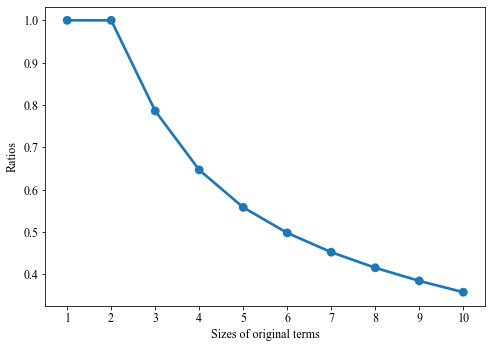

In [33]:
draw_and_save_one_line_graph_points(precent_terms_in_nf,
                               "Sizes of original terms", "Ratios", "Ratio of terms being in normal form among all terms",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Ratio of terms being in normal form among all terms")

### 2. Average length of reduction chains among all terms having normal form

If term has a sequence of beta-reductions, which lead to term's normal form, we'll call this sequence a **reduction chain**.

In [34]:
average_len = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['steps_count'])    

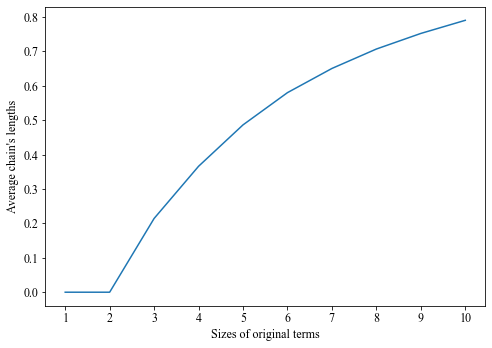

In [35]:
draw_and_save_one_line_graph(average_len,
                               "Sizes of original terms", "Average chain's lengths", 
                             "Average length of reduction chains among all terms having normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average length of reduction chains among all terms having normal form")

### 3. Average length of reduction chains among all terms having normal form excluding terms being already in normal form

In [36]:
average_len_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] != 0)]['steps_count'])  

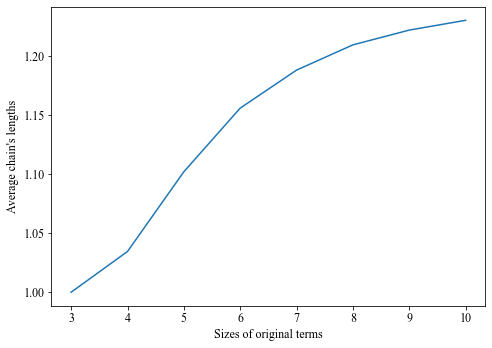

In [37]:
draw_and_save_one_line_graph(average_len_notinnf,
                               "Sizes of original terms", "Average chain's lengths", 
                             "Average length of reduction chains among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average length of reduction chains among all terms having normal form excluding terms being already in normal form")

Distribution of reductions chains lengths among terms of size 10

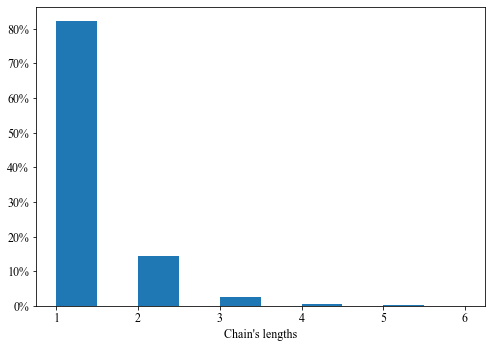

In [42]:
length_to_skip = 20000
data_1 = normal_forms_df[(normal_forms_df['has_normal_form'] == True) &(normal_forms_df['steps_count'] != 0)
               &(normal_forms_df['size_of_term'] == 10)]
info = data_1.steps_count.value_counts() > length_to_skip
dict_info = info.to_dict()
data_filtered = data_1[data_1['steps_count'].map(dict_info)]
data_filtered['steps_count'].value_counts()
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
plt.hist(x=data_filtered['steps_count'], weights=np.ones(len(data_filtered['steps_count'])) / len(data_filtered['steps_count']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Chain's lengths", **font)
plt.tight_layout()
plt.savefig('graph/normal_forms/' + 'Steps_count_distrib' + '.svg', bbox_inches='tight')
plt.show()

### 4. Average size of reduced terms among all terms having normal form

Size of term defines due to article

In [39]:
average_reduced_size = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['size_reduced'])   

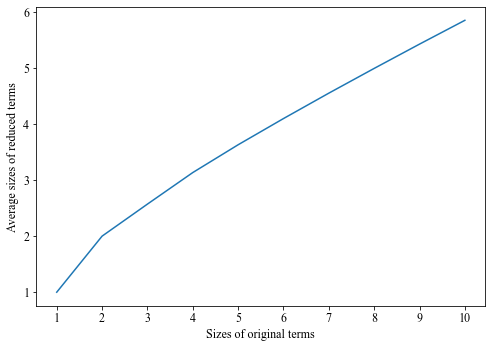

In [40]:
draw_and_save_one_line_graph(average_reduced_size,
                               "Sizes of original terms", "Average sizes of reduced terms",
                             "Average size of reduced terms among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average size of reduced terms among all terms having normal form")

### 5. Average size of reduced terms among all terms having normal form excluding terms being already in normal form

In [43]:
average_reduced_size_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_reduced']) 

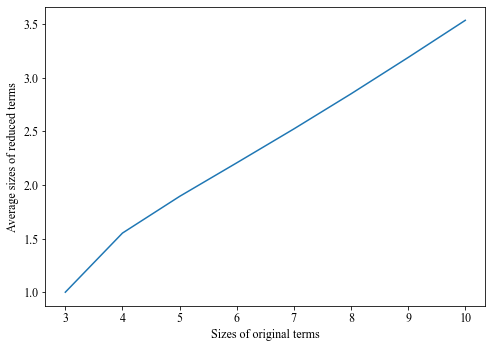

In [44]:
draw_and_save_one_line_graph(average_reduced_size_notinnf,
                               "Sizes of original terms", "Average sizes of reduced terms",
                             "Average size of reduced terms among all terms having normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Average size of reduced terms among all terms having normal form excluding terms being already in normal form")

### 6. Average max term's size during reduction among all terms having normal form excluding terms being already in normal form

In [45]:
average_maxsize_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_maxsize_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_biggest_term_in_steps'])   

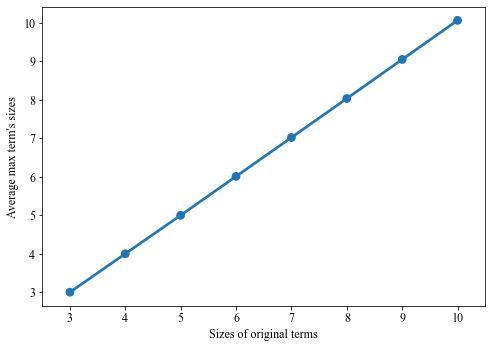

In [46]:
draw_and_save_one_line_graph_points(average_maxsize_notinnf[2:],
                               "Sizes of original terms", "Average max term's sizes", 
                                    "Average max term's size during reduction among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "normal_forms/Average max term's size during reduction among all terms having normal form excluding terms being already in normal form")

### 7. Ratio of max term's size during reduction to the original term's size among all terms having normal form excluding terms being already in normal form

In [47]:
size_ratio_full_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    size_ratio_full_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_biggest_term_in_steps'] /
                                                      normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_of_term'])

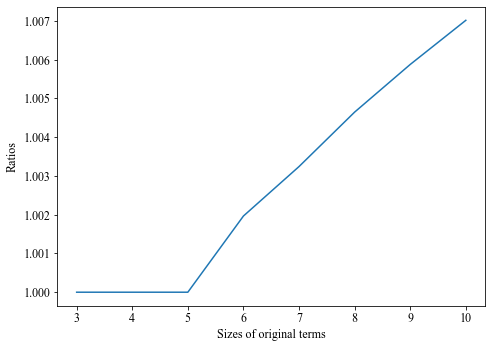

In [55]:
draw_and_save_one_line_graph(size_ratio_full_notinnf,
                              "Sizes of original terms", "Ratios",
                             "Ratio of max term's size during reduction to the original term's size among all terms having normal form excluding terms being already in normal form",
                                normal_forms_df['size_of_term'].unique(),
                               "normal_forms/Ratio of max term's size during reduction to the original term's size among all terms having normal form excluding terms being already in normal form")

### 8. Ratio of "increasing" terms among all terms having no normal form

In [49]:
cnt_to_skip = 4
precent_increasing_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_increasing_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['increasing_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])

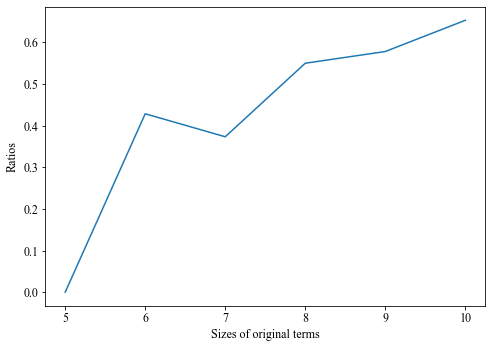

In [50]:
draw_and_save_one_line_graph(precent_increasing_full,                             
                              "Sizes of original terms", "Ratios",
                             " Ratio of \"increasing\" terms among all terms having no normal form",     
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "normal_forms/Ratio of increasing terms among all terms having no normal form")

### 9. Ratio of "looping" terms among all terms having no normal form

In [51]:
precent_cycled_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()) - cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_cycled_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['cycled_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])

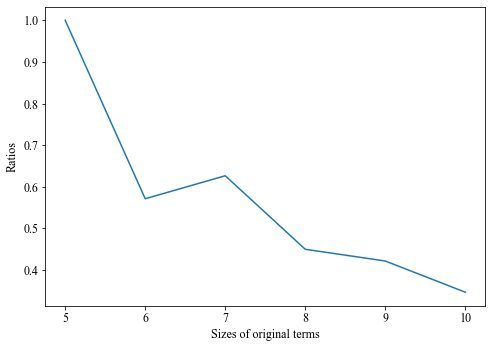

In [52]:
draw_and_save_one_line_graph(precent_cycled_full,                             
                              "Sizes of original terms", "Ratios",
                             " Ratio of \"looping\" terms among all terms having no normal form",     
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                             "normal_forms/Ratio of looping terms among all terms having no normal form")

# 2. Different reduction strategies comparing

In this section we compare results of beta-reducing in different strategies such as:
1. Normal strategy.
2. Call by name strategy.
3. Call by value strategy.

We take all possible closed terms with sizes ∈ [1;11], which ARE NOT abstractions. This is due to fact that Call by Name strategy and Call by Value don't go "under" lambda-abstractions, so those terms are not really informative for research.

## 1. Анализ стратегий

Для термов размера n = [1,18] сравним редукции в различных стратегиях. Будем сравнивать не на всех возможных случайных термах, а только на тех, которые начинаются не абстракцией (потому что они уже в нормальной форме в соответствии со стратегиями вызова оп имени  изначению). Из-за того, что при n = 10 количество возможных термов увеличивается больше, чем на миллион, будем делать так: При n <= 9 берутся все термы (начинающиеся не абстракцией), для n от 10 до 12 включительно - случайные 500к (начинающиеся не абстракцией), от 13 до 15 - 250к (начинающиеся не абстракцией), от 16 до 18 - 100к(начинающиеся не абстракцией). 

 #### 1. Средняя длина цепочки редукций для каждой стратегии

In [ ]:
average_len_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_len_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['steps_count'])
    average_len_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['steps_count'])
    average_len_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['steps_count'])

In [ ]:
draw_and_save_three_lines_graph(average_len_norm, average_len_name, average_len_val,
                               "Размер исходных термов", "Среднее количество шагов редукции", norm_df['size_of_term'].unique(),
                               "strategies/Average_steps_count")

 #### 2. Средняя длина цепочки редукций для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [ ]:
average_len2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_len2_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size)
                                                       &(norm_df['has_normal_form'] == True)
                                                       &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['steps_count'])
    
    average_len2_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size)
                                                       &(name_df['has_normal_form'] == True)
                                                       &(name_df['is_same_norm'] == True)
                                                       &(name_df['is_same_val'] == True)
                                                       &(name_df['is_same_name'] == True)]['steps_count'])
    
    average_len2_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size)
                                                       &(val_df['has_normal_form'] == True)
                                                       &(val_df['is_same_norm'] == True)
                                                       &(val_df['is_same_val'] == True)
                                                       &(val_df['is_same_name'] == True)]['steps_count'])

In [ ]:
draw_and_save_three_lines_graph(average_len2_norm, average_len2_name, average_len2_val,
                               "Размер исходных термов", "Среднее количество шагов редукции", norm_df['size_of_term'].unique(),
                               "strategies/Average_steps_count_same_normal_form")

In [ ]:
average_len2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_len2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_len2_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size)
                                                       &(norm_df['has_normal_form'] == True)
                                                       &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)
                                                       &(norm_df['steps_count'] != 0)]['steps_count'])
    
    average_len2_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size)
                                                       &(name_df['has_normal_form'] == True)
                                                       &(name_df['is_same_norm'] == True)
                                                       &(name_df['is_same_val'] == True)
                                                       &(name_df['is_same_name'] == True)
                                                      &(name_df['steps_count'] != 0)]['steps_count'])
    
    average_len2_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size)
                                                       &(val_df['has_normal_form'] == True)
                                                       &(val_df['is_same_norm'] == True)
                                                       &(val_df['is_same_val'] == True)
                                                       &(val_df['is_same_name'] == True)
                                                    &(val_df['steps_count'] != 0)]['steps_count'])

In [ ]:
draw_and_save_three_lines_graph(average_len2_norm, average_len2_name, average_len2_val,
                               "Размер исходных термов", "Среднее количество шагов редукции", norm_df['size_of_term'].unique(),
                               "strategies/Average_steps_count_same_normal_form_2")

 #### 3. Средний размер редуцированных термов для каждой стратегии

In [ ]:
average_size_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_size_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_reduced'])
    average_size_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_reduced'])
    average_size_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_reduced'])

In [ ]:
draw_and_save_three_lines_graph(average_size_norm, average_size_name, average_size_val,
                               "Размер исходных термов", "Средний размер редуцированного терма", norm_df['size_of_term'].unique(),
                               "strategies/Average_reduced_term_size")

 #### 4. [Бесполезный] Средний размер редуцированных термов для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [ ]:
average_size2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_size2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_size2_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                      &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_reduced'])
    average_size2_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)
                                                      &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_reduced'])
    average_size2_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)
                                                    &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_reduced'])

In [ ]:
draw_and_save_three_lines_graph(average_size2_norm, average_size2_name, average_size2_val,
                               "Размер термов", "Средний размер редуцированного терма", norm_df['size_of_term'].unique(),
                               "Average_reduced_term_size_same_normal_form")

#### 5. Среднее значение максимальных размеров термов во время редукции для каждой стратегии

In [ ]:
average_maxsize_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_maxsize_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    average_maxsize_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    average_maxsize_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])

In [ ]:
draw_and_save_three_lines_graph(average_maxsize_norm, average_maxsize_name, average_maxsize_val,
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции", norm_df['size_of_term'].unique(),
                               "strategies/Average_max_term_size")

#### 6. Среднее значение максимальных размеров термов во время редукции для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [ ]:
average_maxsize2_norm

In [ ]:
norm_df[norm_df['size_biggest_term_in_steps'] < norm_df['size_of_term']]

In [ ]:
average_maxsize2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
average_maxsize2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    average_maxsize2_norm[term_size - 1] = np.mean(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                          &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    average_maxsize2_name[term_size - 1] = np.mean(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)
                                                          &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    average_maxsize2_val[term_size - 1] = np.mean(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)&(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])

In [ ]:
draw_and_save_three_lines_graph(average_maxsize2_norm, average_maxsize2_name, average_maxsize2_val,
                               "Размер исходных термов", "Средний максимальный размер редуцированного терма", norm_df['size_of_term'].unique(),
                               "strategies/Average_max_term_size_same_normal_form")

#### 7. Максимальное значение максимальных размеров термов во время редукции для каждой стратегии

In [ ]:
max_maxsize_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    max_maxsize_norm[term_size - 1] = np.max(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    max_maxsize_name[term_size - 1] = np.max(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    max_maxsize_val[term_size - 1] = np.max(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)]['size_biggest_term_in_steps'])
    

In [ ]:
draw_and_save_three_lines_graph(max_maxsize_norm, max_maxsize_name, max_maxsize_val,
                               "Размер исходных термов", "Максимальный размер терма во время редукции", norm_df['size_of_term'].unique(),
                               "strategies/Max_max_term_size")

#### 8. Максимальное значение максимальных размеров термов во время редукции для каждой стратегии, где вызов по имени и вызов по значению привели терм к нормальной форме в соответствии с нормальной стратегий

In [ ]:
max_maxsize2_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize2_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
max_maxsize2_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    max_maxsize2_norm[term_size - 1] = np.max(norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    max_maxsize2_name[term_size - 1] = np.max(name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    
    max_maxsize2_val[term_size - 1] = np.max(val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)
                                                   &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)]['size_biggest_term_in_steps'])
    

In [ ]:
draw_and_save_three_lines_graph(max_maxsize2_norm, max_maxsize2_name, max_maxsize2_val,
                               "Размер исходных термов", "Максимальный размер терма во время редукции", norm_df['size_of_term'].unique(),
                               "strategies/Max_max_term_size_same_normal_form")

In [ ]:
val_df[val_df['size_of_term'] == 16]['size_biggest_term_in_steps'].dropna().sort_values()

In [ ]:
val_df.iloc[2456106]

In [ ]:
name_df.iloc[2456106]

In [ ]:
norm_df.iloc[2456106]

#### 9. Доля термов, результат редукции которых совпадает во всех 3 стратегиях

#### 10. Доля термов, результат редукции которых совпадает для каждой пары стратегий.

9-10 на одном графике отобразим

In [ ]:
precent_all_same = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_norm_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_norm_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_val_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    cnt_all_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)
                                                       &(norm_df['is_same_name'] == True)].shape[0]
    
    precent_all_same[term_size - 1] = cnt_all_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]
    
    cnt_norm_val_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_val'] == True)].shape[0]
    
    precent_norm_val[term_size - 1] = cnt_norm_val_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]    
    
    
    cnt_norm_name_same =  norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)
                                                     &(norm_df['is_same_norm'] == True)
                                                       &(norm_df['is_same_name'] == True)].shape[0]
    
    precent_norm_name[term_size - 1] = cnt_norm_name_same / norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == True)].shape[0]    
    
    
    cnt_val_name_same =  val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)
                                                     &(val_df['is_same_name'] == True)
                                                       &(val_df['is_same_val'] == True)].shape[0]
    
    precent_val_name[term_size - 1] = cnt_val_name_same / val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == True)].shape[0]    
    
   
    

In [ ]:
fig, axes = plt.subplots(ncols=1,nrows=1, figsize = (8, 5))
axes.set_xticks(norm_df['size_of_term'].unique())
axes.set_xlabel('Размер исходных термов', **font)
# axes.set_ylabel('Доля термов, дающих одинаковый результат в различных стратегиях', **font)
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_all_same, label = 'Во всех стратегиях')    
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_norm_val, label = 'В нормальной стратегии и вызове по значению')
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_norm_name, label = 'В нормальной стратегии и вызове по имени')
sns.lineplot(x=norm_df['size_of_term'].unique(), ax = axes, y=precent_val_name, label = 'В вызове по значению и вызове по имени')
plt.legend(loc = 'best')
plt.legend(prop=font)

fig.tight_layout()
fig.savefig('results/strategies/Precent_same_reduced_terms' + '.svg', bbox_inches='tight')

#### 11. Доля термов, не имеющих нормальную форму в своей стратегии, среди всех термов для каждой стратегии

In [ ]:
precent_no_nf_val = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_no_nf_norm = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)
precent_no_nf_name = np.zeros(shape = len(norm_df['size_of_term'].unique()), dtype=float)

for term_size in norm_df['size_of_term'].unique():
    precent_no_nf_norm[term_size-1] =  (norm_df[(norm_df['size_of_term'] == term_size) &
                                                  (norm_df['has_normal_form'] == False)].shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size)].shape[0])
    
    precent_no_nf_val[term_size-1] =  (val_df[(val_df['size_of_term'] == term_size) &
                                                  (val_df['has_normal_form'] == False)].shape[0]) / (val_df[(val_df['size_of_term'] == term_size)].shape[0])
  

    precent_no_nf_name[term_size-1] =  (name_df[(name_df['size_of_term'] == term_size) &
                                                  (name_df['has_normal_form'] == False)].shape[0]) / (name_df[(norm_df['size_of_term'] == term_size)].shape[0])

    

In [ ]:
draw_and_save_three_lines_graph(precent_no_nf_norm, precent_no_nf_name, precent_no_nf_val,
                               "Размер исходных термов", "Доля термов без нормальной формы среди всех термов", norm_df['size_of_term'].unique(),
                               "strategies/Precent_no_nf_term")

#### 12. Доля термов среди термов без нормальной формы, которые не имеют нормальной формы так как "расходятся" для каждой стратегии

In [ ]:
cnt_to_skip = 4
precent_increasing_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_increasing_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['increasing_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])
    
    
draw_and_save_one_line_graph(precent_increasing_full,
                               "Размер исходных термов", "Доля развертывающихся термов среди термов без нормальной формы",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "just_normal/Precent_increasing_full")

In [ ]:
cnt_to_skip = 4
precent_increase_val = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_increase_norm = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_increase_name = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(norm_df['size_of_term'].unique())):
    precent_increase_norm[term_size - cnt_to_skip] =  (norm_df[(norm_df['size_of_term'] == term_size + 1) &
                                                  (norm_df['has_normal_form'] == False)
                                                     &(norm_df['increasing_reduction'] == True)].shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(norm_df['has_normal_form'] == False)].shape[0])
    
    precent_increase_val[term_size - cnt_to_skip] =  (val_df[(val_df['size_of_term'] == term_size + 1) &
                                                  (val_df['has_normal_form'] == False)
                                                     &(val_df['increasing_reduction'] == True)].shape[0]) / (val_df[(val_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(val_df['has_normal_form'] == False)].shape[0])
    
    precent_increase_name[term_size - cnt_to_skip] =  (name_df[(name_df['size_of_term'] == term_size + 1) &
                                                  (name_df['has_normal_form'] == False)
                                                     &(name_df['increasing_reduction'] == True)].shape[0]) / (name_df[(name_df['size_of_term'] == term_size + 1) 
                                                                                                                    &(name_df['has_normal_form'] == False)].shape[0])
   
    

In [ ]:
draw_and_save_three_lines_graph(precent_increase_norm, precent_increase_name, precent_increase_val,
                               "Размер исходых термов", "Доля развертывающихся термов среди всех термов, не имеющих нормальную форму",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, norm_df['size_of_term'].unique()[:len(norm_df['size_of_term'].unique())- cnt_to_skip]),
                               "strategies/Precent_increasing_term")

#### 13. Доля термов среди термов без нормальной формы, которые не имеют нормальной формы так как "зацикливаются" для каждой стратегии

In [ ]:
cnt_to_skip = 4
precent_cycled_val = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_cycled_norm = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)
precent_cycled_name = np.zeros(shape = len(norm_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(norm_df['size_of_term'].unique())):
    precent_cycled_norm[term_size - cnt_to_skip] =  (norm_df[(norm_df['size_of_term'] == term_size + 1) &
                                                  (norm_df['has_normal_form'] == False)
                                                     &(norm_df['cycled_reduction'] == True)]
                                                     .shape[0]) / (norm_df[(norm_df['size_of_term'] == term_size + 1)
                                                                           &(norm_df['has_normal_form'] == False)].shape[0])
    
    precent_cycled_val[term_size - cnt_to_skip] =  (val_df[(val_df['size_of_term'] == term_size + 1) &
                                                  (val_df['has_normal_form'] == False)
                                                     &(val_df['cycled_reduction'] == True)]
                                                    .shape[0]) / (val_df[(val_df['size_of_term'] == term_size + 1)
                                                                         &(val_df['has_normal_form'] == False)].shape[0])
    
    precent_cycled_name[term_size - cnt_to_skip] =  ( name_df[(name_df['size_of_term'] == term_size + 1) &
                                                  (name_df['has_normal_form'] == False)
                                                     &(name_df['cycled_reduction'] == True)].
                                                     shape[0]) / (name_df[(name_df['size_of_term'] == term_size + 1)
                                                                          &(name_df['has_normal_form'] == False)].shape[0])
   
    

In [ ]:
draw_and_save_three_lines_graph(precent_cycled_norm, precent_cycled_name, precent_cycled_val,
                               "Размер исходных термов", "Доля зацикливающихся термов среди всех термов, не имеющих нормальную форму", np.apply_along_axis(lambda x: x + cnt_to_skip, 0, norm_df['size_of_term'].unique()[:len(norm_df['size_of_term'].unique())- cnt_to_skip]),
                               "strategies/Precent_cycled_term")

## 2. Анализ приведения к нормальной форме в нормальной стратегии

In [ ]:
normal_forms_df.shape[0]

In [ ]:
1 - normal_forms_df[normal_forms_df['steps_count'] == 0].shape[0] / normal_forms_df.shape[0]

In [ ]:
def draw_and_save_one_line_graph_points(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.pointplot(x=x_data, ax=axes, y=x)
#     sns.lineplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

#### 0. Доля термов, которые уже в нормальной форме

In [ ]:
precent_terms_in_nf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    precent_terms_in_nf[term_size - 1] = normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] == 0)].shape[0] / normal_forms_df[normal_forms_df['size_of_term'] == term_size].shape[0]

In [ ]:
draw_and_save_one_line_graph_points(precent_terms_in_nf,
                               "Размер исходных термов", "Доля термов, которые уже в нормальной форме",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Precent_terms_already_in_normal_form_2")

In [ ]:
draw_and_save_one_line_graph(precent_terms_in_nf,
                               "Размер термов", "Доля термов, которые уже в нормальной форме",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Precent_terms_already_in_normal_form")

#### 1. Средняя длина цепочки редукций

In [ ]:
average_len = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['steps_count'])    

In [ ]:
draw_and_save_one_line_graph(average_len,
                               "Размер термов", "Средняя длина цепочки редукций, приведших терм в нормальную форму в соответствии с нормальной стратегией",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_chain_length_full")

#### 2. Средняя длина цепочки редукций среди термов, которые не были уже в нормальной форме

In [ ]:
average_len_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_len_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) &
                                                                (normal_forms_df['steps_count'] != 0)]['steps_count'])    

In [ ]:
draw_and_save_one_line_graph(average_len_notinnf,
                               "Размер термов", "Средняя длина цепочки редукций, приведших терм в нормальную форму в соответствии с нормальной стратегией среди термов, которые не были в нормальной форме",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_chain_length_not_in_nf")

In [ ]:
draw_and_save_one_line_graph_points(average_len_notinnf[2:],
                               "Размер исходных термов", "Средняя длина цепочки редукций, приведших терм в нормальную форму в соответствии с нормальной стратегией среди термов, которые не были в нормальной форме",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Average_chain_length_not_in_nf_2")

#### 3. Средний размер редуцированных термов

In [ ]:
average_reduced_size = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)]['size_reduced'])    

In [ ]:
draw_and_save_one_line_graph(average_reduced_size,
                               "Размер термов", "Средний размер редуцированных термов",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_reduced_term_size_full")

#### 4. Средний размер редуцированных термов среди термов, которые были изначально не в нормальной форме

In [ ]:
average_reduced_size_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_reduced_size_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_reduced'])    

In [ ]:
draw_and_save_one_line_graph(average_reduced_size_notinnf,
                               "Размер термов", "Средний размер редуцированных термов среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_reduced_term_size_not_in_nf")

In [ ]:
draw_and_save_one_line_graph_points(average_reduced_size_notinnf[2:],
                               "Размер исходных термов", "Средний размер редуцированных термов среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Average_reduced_term_size_not_in_nf_2")


посчитать уравнение

#### 5. Средний максимальный размер термов во время редуцирования (среди термов, которые были изначально не в нормальной форме)

In [ ]:
normal_forms_df[(normal_forms_df['steps_count'] != 0) & (normal_forms_df['size_biggest_term_in_steps'] > normal_forms_df['size_of_term'])]

In [ ]:
average_maxsize_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    average_maxsize_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_biggest_term_in_steps'])    

In [ ]:
def draw_and_save_one_line_graph(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
    axes.set_ylabel(ylabel, **font)
    sns.pointplot(x=x_data, ax = axes, y=x)
#     sns.lineplot(x=x_data, ax = axes, y=x, markers= True, style="logic", hue="logic")
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig(output_name + '.png', bbox_inches='tight')

In [ ]:
draw_and_save_one_line_graph(average_maxsize_notinnf,
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_max_size_not_in_nf_2")


In [ ]:
draw_and_save_one_line_graph_points(average_maxsize_notinnf[2:],
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Average_max_size_not_in_nf_2")

In [ ]:
def draw_and_save_with_y_eq_x(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.lineplot(x=x_data, ax = axes, y=x, label = 'Нормальная стратегия')
    sns.lineplot(x=range(3,11), ax = axes, y = range(3,11), label='y = x')
#     axes.set(xscale="log", yscale="log")
    plt.legend(loc = 'best')
    plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

In [ ]:
draw_and_save_with_y_eq_x(average_maxsize_notinnf,
                               "Размер исходных термов", "Средний максимальный размер терма во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Average_max_size_not_in_nf2")

#### 6. Максимальный максимальный размер термов во время редукции (среди термов, которые были изначально не в нормальной форме)

In [ ]:
max_maxsize_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    max_maxsize_notinnf[term_size - 1] = np.max(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True)
                                                                         &(normal_forms_df['steps_count'] != 0)]['size_biggest_term_in_steps'])    

In [ ]:
draw_and_save_one_line_graph( max_maxsize_notinnf,
                               "Размер термов", "Максимальный максимальный размер термов во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Max_max_size_full_not_in_nf")

In [ ]:
draw_and_save_one_line_graph_points(max_maxsize_notinnf[2:],
                               "Размер исходных термов", "Максимальный максимальный размер термов во время редукции среди термов, изначально не в нормальной фомре",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Max_max_size_full_not_in_nf_2")

In [ ]:
normal_forms_df.head(1)

In [ ]:
normal_forms_df.head(1)

In [ ]:
normal_forms_df[(normal_forms_df['size_of_term'] == 9) & (normal_forms_df['size_biggest_term_in_steps'] > 500)]

#### 7. Отношение максимального размера терма во время редукции к первоначальному размеру

In [ ]:
size_ratio_full_notinnf = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()), dtype=float)

for term_size in normal_forms_df['size_of_term'].unique():
    size_ratio_full_notinnf[term_size - 1] = np.mean(normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_biggest_term_in_steps'] /
                                                      normal_forms_df[(normal_forms_df['size_of_term'] == term_size) &
                                                  (normal_forms_df['has_normal_form'] == True) & (normal_forms_df['steps_count'] != 0)]
                                                      ['size_of_term'])

In [ ]:
draw_and_save_one_line_graph(size_ratio_full_notinnf,
                               "Размер термов", "Отношение максимального размера во время редукции к размеру первоначального терма в среднем",
                                normal_forms_df['size_of_term'].unique(),
                               "size_ratio_full")

In [ ]:
def draw_and_save_one_line_graph2(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_ylim(1,1.1)
    axes.set_yticks(np.arange(1,1.1,0.01))
#     axes.set(yscale="log")
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.lineplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

In [ ]:
def draw_and_save_one_line_graph2_points(x, xlabel, ylabel, x_data, output_name = None):
    fig, axes = plt.subplots(ncols=1,nrows=1)
    axes.set_xticks(x_data)
    axes.set_ylim(1,1.1)
    axes.set_yticks(np.arange(1,1.1,0.01))
#     axes.set(yscale="log")
    axes.set_xlabel(xlabel, **font)
#     axes.set_ylabel(ylabel, **font)
    sns.pointplot(x=x_data, ax = axes, y=x)
#     plt.legend(loc = 'best')
#     plt.legend(prop=font)

    if (output_name is not None):
        fig.tight_layout()
        fig.savefig('results/' + output_name + '.svg', bbox_inches='tight')

In [ ]:
draw_and_save_one_line_graph2(size_ratio_full_notinnf,
                               "Размер термов", "Отношение максимального размера во время редукции к размеру первоначального терма в среднем",
                                normal_forms_df['size_of_term'].unique(),
                               "just_normal/Size_ratio_not_in_nf")

In [ ]:
draw_and_save_one_line_graph2_points(size_ratio_full_notinnf[2:],
                               "Размер исходных термов", "Отношение максимального размера во время редукции к размеру первоначального терма в среднем",
                                normal_forms_df['size_of_term'].unique()[2:],
                               "just_normal/Size_ratio_not_in_nf_2")

#### 8. Доля "развертывающихся" термов среди термов без нормальной формы

In [ ]:
cnt_to_skip = 4
precent_increasing_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique())- cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_increasing_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['increasing_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])

In [ ]:
draw_and_save_one_line_graph(precent_increasing_full,
                               "Размер исходных термов", "Доля развертывающихся термов среди термов без нормальной формы",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "just_normal/Precent_increasing_full")

In [ ]:
precent_increasing_full

In [ ]:
precent_cycled_full

#### 9. Доля "зацикливающихся" термов среди термов без нормальной формы

In [ ]:

precent_cycled_full = np.zeros(shape = len(normal_forms_df['size_of_term'].unique()) - cnt_to_skip, dtype=float)

for term_size in range(cnt_to_skip, len(normal_forms_df['size_of_term'].unique())):
    precent_cycled_full[term_size - cnt_to_skip] = (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)
                                                                         &(normal_forms_df['cycled_reduction'] == True)].shape[0]
                                             ) / (normal_forms_df[(normal_forms_df['size_of_term'] == term_size + 1) &
                                                  (normal_forms_df['has_normal_form'] == False)].shape[0])


In [ ]:
draw_and_save_one_line_graph(precent_cycled_full,
                               "Размер исходных термов", "Доля зацикливающихся термов среди термов без нормальной формы",
                                np.apply_along_axis(lambda x: x + cnt_to_skip, 0, normal_forms_df['size_of_term'].unique()[:len(normal_forms_df['size_of_term'].unique())- cnt_to_skip]),
                               "just_normal/Precent_cycled_full")

#### Распределение длин цепочек редукций среди термов размера 10

In [ ]:
length_to_skip = 20000

In [ ]:
data_1 = normal_forms_df[(normal_forms_df['has_normal_form'] == True) &(normal_forms_df['steps_count'] != 0)
               &(normal_forms_df['size_of_term'] == 10)]

In [ ]:
info = data_1.steps_count.value_counts() > length_to_skip
dict_info = info.to_dict()

In [ ]:
data_filtered = data_1[data_1['steps_count'].map(dict_info)]

In [ ]:
data_filtered['steps_count'].value_counts()

In [ ]:
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
plt.hist(x=data_filtered['steps_count'], weights=np.ones(len(data_filtered['steps_count'])) / len(data_filtered['steps_count']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Длина цепочек редукций", **font)
plt.tight_layout()
plt.savefig('results/just_normal/' + 'Steps_count_distrib' + '.svg', bbox_inches='tight')
plt.show()